# Naive Bayes

### Name: Mantas Macionis
### StudentID: C00242178

This is a notebook on Naive Bayes, covering Gaussian Naive Bayes and Multinomial Naive Bayes. 
Originally created by Jake Vanderplas and downloaded from: [github](https://github.com/jakevdp/PythonDataScienceHandbook/blob/8a34a4f653bdbdc01415a94dc20d4e9b97438965/notebooks/05.05-Naive-Bayes.ipynb)

The purpose of editing this notebook is to get a better understanding of the models being used, how they function, and as a result, the scenarios, datatypes and parameter changes which they are most suited for.

[Link to Gaussian Naive Bayes Changelog](#gaussian-naive-bayes-changelog)

[Link to Multinomial Naive Bayes Changelog](#multinomial-naive-bayes-changelog)



## Overview of changes 
### Changes to Gaussian Naive Bayes Section
- Split the original model into training and test sets, to check metric scores
- Metrics all 1.0 indicating potential overfitting due to very basic dataset in use
- Load WineQuality dataset from UCI machine learning repository, train model on this new data, low metric scores achieved
- Balance the dataset using smote, scores see improvements of approximately .20 all round
- Remove extreme outliers from dataset, test metrics again, metrics nearly the same
- Change dataset to Load_digits, train model, much better metrics achieved
- Output a confusion matrix for the model with the load_digits dataset in use

### Changes to Multinomial Naive Bayes Section
- Use already created test set labels to get metrics for the Multinomial example in use
- Metrics are relatively high, approximately .80 all round
- Visualise the newsgroups dataset topwords to see why metrics may be so high, indicates highly conversational words commonly used
- Change dataset to NLTK reuters dataset
- Split into training and testing, train the model, output metrics
- Metric scores are poor
- Adjust vectorizing parameters, output metrics again, major improvement in metric scores
- Visualise topwords in the reuters dataset, words are much more concise/business related, demonstrating why model initially struggled 



# In Depth: Naive Bayes Classification

The previous four sections have given a general overview of the concepts of machine learning.
In this section and the ones that follow, we will be taking a closer look at several specific algorithms for supervised and unsupervised learning, starting here with naive Bayes classification.

Naive Bayes models are a group of extremely fast and simple classification algorithms that are often suitable for very high-dimensional datasets.
Because they are so fast and have so few tunable parameters, they end up being very useful as a quick-and-dirty baseline for a classification problem.
This section will focus on an intuitive explanation of how naive Bayes classifiers work, followed by a couple examples of them in action on some datasets.

## Bayesian Classification

Naive Bayes classifiers are built on Bayesian classification methods.
These rely on Bayes's theorem, which is an equation describing the relationship of conditional probabilities of statistical quantities.
In Bayesian classification, we're interested in finding the probability of a label given some observed features, which we can write as $P(L~|~{\rm features})$.
Bayes's theorem tells us how to express this in terms of quantities we can compute more directly:

$$
P(L~|~{\rm features}) = \frac{P({\rm features}~|~L)P(L)}{P({\rm features})}
$$

If we are trying to decide between two labels—let's call them $L_1$ and $L_2$—then one way to make this decision is to compute the ratio of the posterior probabilities for each label:

$$
\frac{P(L_1~|~{\rm features})}{P(L_2~|~{\rm features})} = \frac{P({\rm features}~|~L_1)}{P({\rm features}~|~L_2)}\frac{P(L_1)}{P(L_2)}
$$

All we need now is some model by which we can compute $P({\rm features}~|~L_i)$ for each label.
Such a model is called a *generative model* because it specifies the hypothetical random process that generates the data.
Specifying this generative model for each label is the main piece of the training of such a Bayesian classifier.
The general version of such a training step is a very difficult task, but we can make it simpler through the use of some simplifying assumptions about the form of this model.

This is where the "naive" in "naive Bayes" comes in: if we make very naive assumptions about the generative model for each label, we can find a rough approximation of the generative model for each class, and then proceed with the Bayesian classification.
Different types of naive Bayes classifiers rest on different naive assumptions about the data, and we will examine a few of these in the following sections.

We begin with the standard imports:

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

## Gaussian Naive Bayes

Perhaps the easiest naive Bayes classifier to understand is Gaussian naive Bayes.
In this classifier, the assumption is that *data from each label is drawn from a simple Gaussian distribution*.
Imagine that you have the following data:

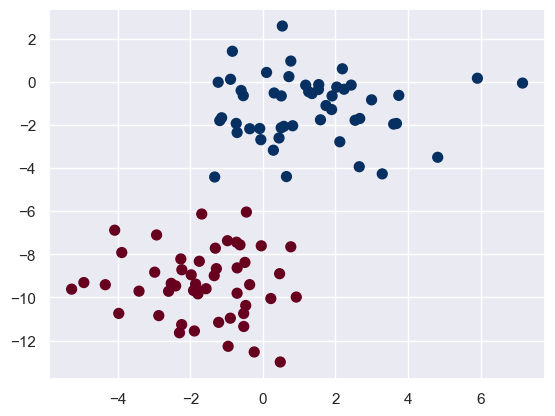

In [2]:
from sklearn.datasets import make_blobs
X, y = make_blobs(100, 2, centers=2, random_state=2, cluster_std=1.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='RdBu');

One extremely fast way to create a simple model is to assume that the data is described by a Gaussian distribution with no covariance between dimensions.
This model can be fit by simply finding the mean and standard deviation of the points within each label, which is all you need to define such a distribution.
The result of this naive Gaussian assumption is shown in the following figure:

![(run code in Appendix to generate image)](figures/05.05-gaussian-NB.png)
[figure source in Appendix](06.00-Figure-Code.ipynb#Gaussian-Naive-Bayes)

The ellipses here represent the Gaussian generative model for each label, with larger probability toward the center of the ellipses.
With this generative model in place for each class, we have a simple recipe to compute the likelihood $P({\rm features}~|~L_1)$ for any data point, and thus we can quickly compute the posterior ratio and determine which label is the most probable for a given point.

This procedure is implemented in Scikit-Learn's ``sklearn.naive_bayes.GaussianNB`` estimator:

In [3]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X, y);

Now let's generate some new data and predict the label:

In [4]:
rng = np.random.RandomState(0)
Xnew = [-6, -14] + [14, 18] * rng.rand(2000, 2)
ynew = model.predict(Xnew)

Now we can plot this new data to get an idea of where the decision boundary is:

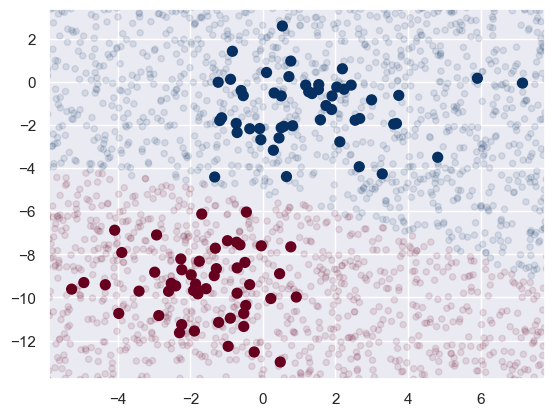

In [5]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='RdBu')
lim = plt.axis()
plt.scatter(Xnew[:, 0], Xnew[:, 1], c=ynew, s=20, cmap='RdBu', alpha=0.1)
plt.axis(lim);

We see a slightly curved boundary in the classifications—in general, the boundary in Gaussian naive Bayes is quadratic.

A nice piece of this Bayesian formalism is that it naturally allows for probabilistic classification, which we can compute using the ``predict_proba`` method:

In [6]:
yprob = model.predict_proba(Xnew)
yprob[-8:].round(2)

array([[0.89, 0.11],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [0.  , 1.  ],
       [0.15, 0.85]])

<a id="gaussian-naive-bayes-changelog"></a>

# Gaussian Naive Bayes Changelog



- splitting the original dataset being used above into training and test splits

In [7]:
from sklearn.model_selection import train_test_split

# Split the original dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Gaussian Naive Bayes model on the training set
model.fit(X_train, y_train);

## Gaussian Naive bayes metrics with the original dataset

In [8]:
from sklearn.metrics import accuracy_score, recall_score, f1_score

# Predictions on the test set
predictions = model.predict(X_test)

# Calculate metrics for the test set
accuracy = accuracy_score(y_test, predictions)
recall = recall_score(y_test, predictions, average='macro')  # Use 'binary' for binary classification, 'macro' for multi-class
f1 = f1_score(y_test, predictions, average='macro')  # Same as above for the 'average' parameter

print(f"Accuracy: {accuracy}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

Accuracy: 1.0
Recall: 1.0
F1 Score: 1.0


-  All metrics 1.0 indicating overfitting due to basic make_blobs dataset

## Gaussian Naive Bayes with WineQuality dataset from UCI machine learning repository

In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, recall_score, f1_score, precision_score

# Load the dataset
dataset_path = 'winequality-combined.csv'  
wine_data = pd.read_csv(dataset_path)

# target variable is 'quality'
X = wine_data.drop('quality', axis=1)
y = wine_data['quality']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize Gaussian Naive Bayes model
model = GaussianNB()

# Train the model
model.fit(X_train_scaled, y_train)

# Make predictions on the test set
predictions = model.predict(X_test_scaled)

# Calculate metrics
accuracy = accuracy_score(y_test, predictions)
precision = precision_score(y_test, predictions, average='macro', zero_division=0)
recall = recall_score(y_test, predictions, average='macro')
f1 = f1_score(y_test, predictions, average='macro')

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

Accuracy: 0.4653846153846154
Precision: 0.28929413651307373
Recall: 0.2771469175987428
F1 Score: 0.2551069894523074


- Metric scores are low
- potentially due to WineQuality dataset being imbalanced

## Balanced WineQuality dataset usage
- WineQuality dataset has been balanced using SMOTE

In [10]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, recall_score, f1_score, precision_score

# Load the dataset
dataset_path = 'balancedWINE.csv'  # Updated to the correct path
wine_data = pd.read_csv(dataset_path)

#target variable is 'quality'
X = wine_data.drop('quality', axis=1)
y = wine_data['quality']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize Gaussian Naive Bayes model
model = GaussianNB()

# Train the model
model.fit(X_train_scaled, y_train)

# Make predictions on the test set
predictions = model.predict(X_test_scaled)

# Calculate metrics
accuracy = accuracy_score(y_test, predictions)
precision = precision_score(y_test, predictions, average='macro', zero_division=0)
recall = recall_score(y_test, predictions, average='macro')
f1 = f1_score(y_test, predictions, average='macro')

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

Accuracy: 0.4251993620414673
Precision: 0.4097975479377284
Recall: 0.4255023518676701
F1 Score: 0.38945660770492996


- All scores apart from accuracy see an increase of approximately .20
- Potentially limited scores due to extreme outliers in the dataset

## WineQuality Gaussian Naive Bayes with outliers removed

In [11]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, recall_score, f1_score, precision_score

# Load the dataset
dataset_path = 'balancedOUTLIER.csv'
wine_data = pd.read_csv(dataset_path)

#target variable is 'quality'
X = wine_data.drop('quality', axis=1)
y = wine_data['quality']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features by removing the mean and scaling to unit variance
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize Gaussian Naive Bayes model
model = GaussianNB()

# Train the model
model.fit(X_train_scaled, y_train)

# Make predictions on the test set
predictions = model.predict(X_test_scaled)

# Calculate metrics
accuracy = accuracy_score(y_test, predictions)
precision = precision_score(y_test, predictions, average='macro', zero_division=0)
recall = recall_score(y_test, predictions, average='macro')
f1 = f1_score(y_test, predictions, average='macro')

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

Accuracy: 0.42513274336283186
Precision: 0.4011101561256873
Recall: 0.4174654809419364
F1 Score: 0.39037536021466046


- Scores see a very minor improvement
- Indicating outliers were not causing the low metric scores
- Complex relationships in wine dataset demonstrate limitations of Gaussian Naive bayes
- One of the core assumptions of Naive Bayes is feature independance, features such as acidity level, sugar content, alcohol level may have complex interdependencies

## Gaussian Naive Bayes with Digits Dataset
- Dataset is based on digit recognition, which is a more practical problem with clear applications

In [12]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Load the Digits dataset
digits = load_digits()
X = digits.data
y = digits.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Gaussian Naive Bayes model
model = GaussianNB()
model.fit(X_train, y_train)

# Make predictions
predictions = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, predictions)
precision = precision_score(y_test, predictions, average='macro', zero_division=0)
recall = recall_score(y_test, predictions, average='macro')
f1 = f1_score(y_test, predictions, average='macro')

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

Accuracy: 0.8472222222222222
Precision: 0.8649844547206135
Recall: 0.8476479221745045
F1 Score: 0.8437352605469787


- High Accuracy scores are achieved
- Demonstrating the abilities of Gaussian Naive Bayes when dealing with a more clear problem, not being limited by potentially complex interdependencies

## Confusion Matrix for the Gaussian Naive Bayes Model

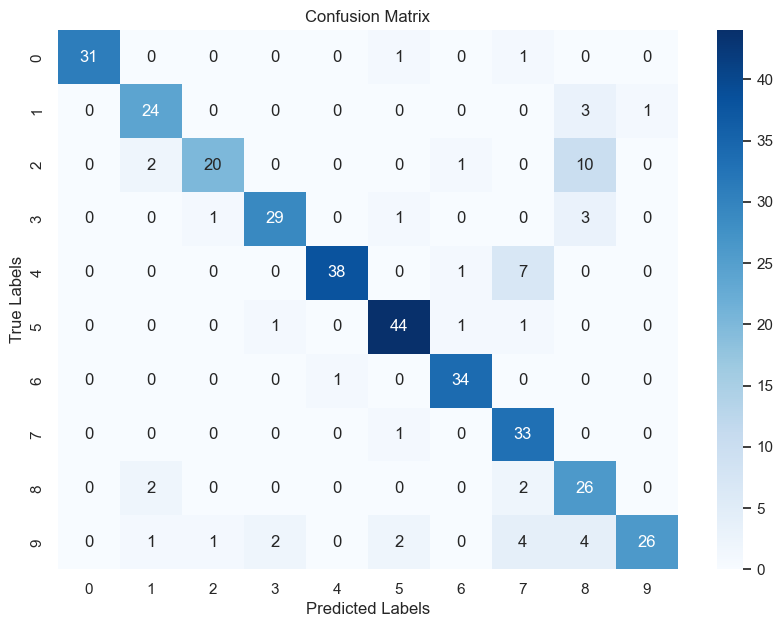

In [13]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Confusion Matrix
cm = confusion_matrix(y_test, predictions)

# Plotting
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()



## Multinomial Naive Bayes

The Gaussian assumption just described is by no means the only simple assumption that could be used to specify the generative distribution for each label.
Another useful example is multinomial naive Bayes, where the features are assumed to be generated from a simple multinomial distribution.
The multinomial distribution describes the probability of observing counts among a number of categories, and thus multinomial naive Bayes is most appropriate for features that represent counts or count rates.

The idea is precisely the same as before, except that instead of modeling the data distribution with the best-fit Gaussian, we model the data distribuiton with a best-fit multinomial distribution.

### Example: Classifying Text

One place where multinomial naive Bayes is often used is in text classification, where the features are related to word counts or frequencies within the documents to be classified.
We discussed the extraction of such features from text in [Feature Engineering](05.04-Feature-Engineering.ipynb); here we will use the sparse word count features from the 20 Newsgroups corpus to show how we might classify these short documents into categories.

Let's download the data and take a look at the target names:

In [14]:
from sklearn.datasets import fetch_20newsgroups

data = fetch_20newsgroups()
data.target_names

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

For simplicity here, we will select just a few of these categories, and download the training and testing set:

In [15]:
categories = ['talk.religion.misc', 'soc.religion.christian',
              'sci.space', 'comp.graphics']
train = fetch_20newsgroups(subset='train', categories=categories)
test = fetch_20newsgroups(subset='test', categories=categories)

Here is a representative entry from the data:

In [16]:
print(train.data[5])

From: dmcgee@uluhe.soest.hawaii.edu (Don McGee)
Subject: Federal Hearing
Originator: dmcgee@uluhe
Organization: School of Ocean and Earth Science and Technology
Distribution: usa
Lines: 10


Fact or rumor....?  Madalyn Murray O'Hare an atheist who eliminated the
use of the bible reading and prayer in public schools 15 years ago is now
going to appear before the FCC with a petition to stop the reading of the
Gospel on the airways of America.  And she is also campaigning to remove
Christmas programs, songs, etc from the public schools.  If it is true
then mail to Federal Communications Commission 1919 H Street Washington DC
20054 expressing your opposition to her request.  Reference Petition number

2493.



In order to use this data for machine learning, we need to be able to convert the content of each string into a vector of numbers.
For this we will use the TF-IDF vectorizer (discussed in [Feature Engineering](05.04-Feature-Engineering.ipynb)), and create a pipeline that attaches it to a multinomial naive Bayes classifier:

In [17]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline

model = make_pipeline(TfidfVectorizer(), MultinomialNB())

With this pipeline, we can apply the model to the training data, and predict labels for the test data:

In [18]:
model.fit(train.data, train.target)
labels = model.predict(test.data)

Now that we have predicted the labels for the test data, we can evaluate them to learn about the performance of the estimator.
For example, here is the confusion matrix between the true and predicted labels for the test data:

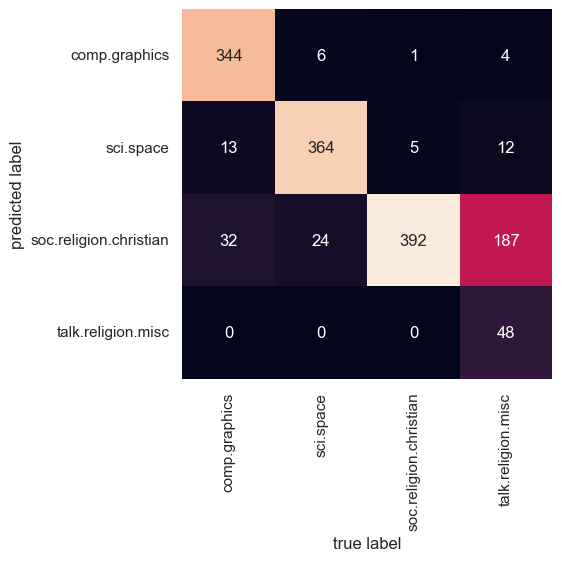

In [19]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(test.target, labels)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=train.target_names, yticklabels=train.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label');

Evidently, even this very simple classifier can successfully separate space talk from computer talk, but it gets confused between talk about religion and talk about Christianity.
This is perhaps an expected area of confusion!

The very cool thing here is that we now have the tools to determine the category for *any* string, using the ``predict()`` method of this pipeline.
Here's a quick utility function that will return the prediction for a single string:

In [20]:
def predict_category(s, train=train, model=model):
    pred = model.predict([s])
    return train.target_names[pred[0]]

Let's try it out:

In [21]:
predict_category('sending a payload to the ISS')

'sci.space'

In [22]:
predict_category('discussing islam vs atheism')

'soc.religion.christian'

In [23]:
predict_category('determining the screen resolution')

'comp.graphics'

<a id="multinomial-naive-bayes-changelog"></a>

# Multinomial Naive Bayes Changelog

### Multinomial Naive Bayes with original dataset - metrics

In [26]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Calculate metrics using the test set labels and the predictions from the Multinomial Naive Bayes model.
mn_accuracy = accuracy_score(test.target, labels)
mn_precision = precision_score(test.target, labels, average='weighted', zero_division=0)
mn_recall = recall_score(test.target, labels, average='weighted')
mn_f1 = f1_score(test.target, labels, average='weighted')

# Print out the metrics for the Multinomial Naive Bayes model.
print(f"Multinomial NB Accuracy: {mn_accuracy}")
print(f"Multinomial NB Precision: {mn_precision}")
print(f"Multinomial NB Recall: {mn_recall}")
print(f"Multinomial NB F1 Score: {mn_f1}")

Multinomial NB Accuracy: 0.8016759776536313
Multinomial NB Precision: 0.8642744183395362
Multinomial NB Recall: 0.8016759776536313
Multinomial NB F1 Score: 0.772606808972065


- Scores achieved are quote good
- Indicating the dataset in use may be well suited for multinomial naive bayes
- reason for scores being limited to approx .80 may be due to chosen newsgroups having overlapping words, due to similarity of the topics chosen

## Visualise the topwords in the newsgroups dataset

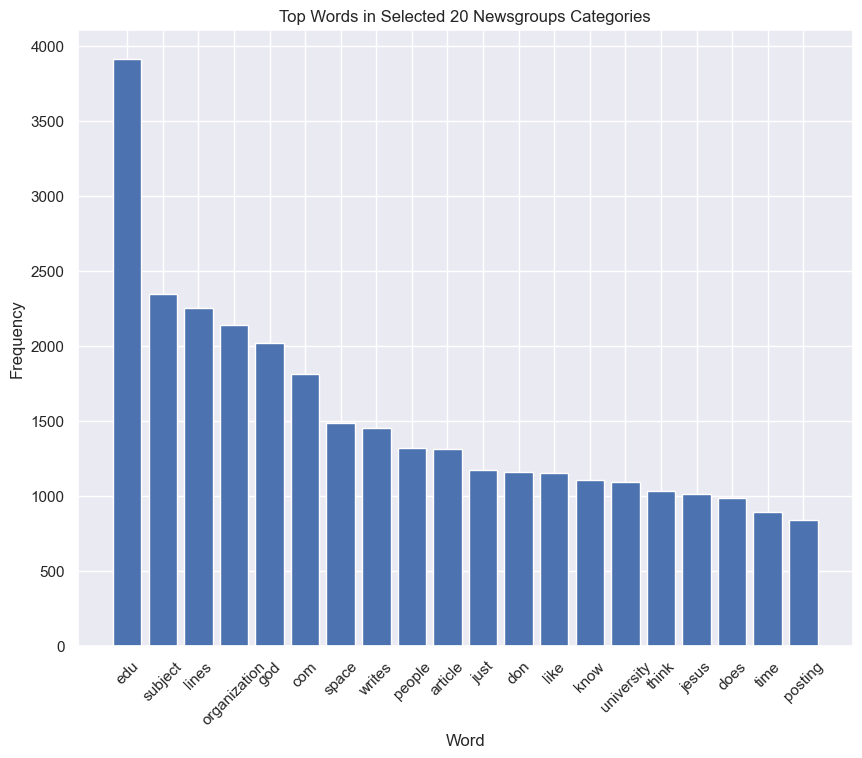

In [27]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt
import numpy as np

# Fetch the 20 newsgroups dataset
categories = ['talk.religion.misc', 'soc.religion.christian', 'sci.space', 'comp.graphics']
newsgroups_train = fetch_20newsgroups(subset='train', categories=categories)

# Initialize the CountVectorizer
vectorizer = CountVectorizer(stop_words='english', max_features=20)

# Fit and transform the dataset to a term-frequency matrix
X_counts = vectorizer.fit_transform(newsgroups_train.data)

# Sum up the counts of each term to get the total count across all documents
word_counts = np.sum(X_counts.toarray(), axis=0)
words = vectorizer.get_feature_names_out()

# Sort words by their count
sorted_word_counts = sorted(zip(words, word_counts), key=lambda x: x[1], reverse=True)

words, counts = zip(*sorted_word_counts)

# Plotting
plt.figure(figsize=(10, 8))
plt.bar(words, counts)
plt.xticks(rotation=45)
plt.xlabel('Word')
plt.ylabel('Frequency')
plt.title('Top Words in Selected 20 Newsgroups Categories')
plt.show()


- Visualisation shows a good distribution of words, not skewed, allowing for model to train well

## Multinomial Naive Bayes with reuters dataset from NLTK
- reuters dataset is a collection of categorised news articles from the 80's mainly related to business and finance

In [28]:
import nltk
from nltk.corpus import reuters
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import LabelEncoder

# Fetching the document ids for training and testing subsets
train_docs_id = list(filter(lambda doc: doc.startswith("train"), reuters.fileids()))
test_docs_id = list(filter(lambda doc: doc.startswith("test"), reuters.fileids()))

# Fetching the actual documents and their corresponding labels
train_docs = [reuters.raw(doc_id) for doc_id in train_docs_id]
test_docs = [reuters.raw(doc_id) for doc_id in test_docs_id]
train_labels = [reuters.categories(doc_id)[0] for doc_id in train_docs_id]  # Taking the first category
test_labels = [reuters.categories(doc_id)[0] for doc_id in test_docs_id]

# Vectorizing the documents using TF-IDF
vectorizer = TfidfVectorizer()
X_train = vectorizer.fit_transform(train_docs)
X_test = vectorizer.transform(test_docs)

# Encoding all possible labels with LabelEncoder
encoder = LabelEncoder()
encoder.fit(reuters.categories())  # Fit the encoder on all possible labels
y_train = encoder.transform(train_labels)
y_test = encoder.transform(test_labels)

# Training the Multinomial Naive Bayes model
model = MultinomialNB()
model.fit(X_train, y_train)

# Making predictions on the test set
predictions = model.predict(X_test)

# Calculating and displaying accuracy, precision, recall, and F1 score
accuracy = accuracy_score(y_test, predictions)
precision = precision_score(y_test, predictions, average='weighted', zero_division=0)
recall = recall_score(y_test, predictions, average='weighted')
f1 = f1_score(y_test, predictions, average='weighted')

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")


Accuracy: 0.6223915203709838
Precision: 0.5661686794096599
Recall: 0.6223915203709838
F1 Score: 0.5116102695149087


- Scores are low relative to newsgroups dataset
- May indicate articles are more skewed. With similar language being used across categories

## Parameter change - Adjusted Vectorizing using TF-IDF
- capturing sequences of words
- removing stopwords

In [30]:
import nltk
from nltk.corpus import reuters
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import LabelEncoder

# Fetching the document ids for training and testing subsets
train_docs_id = list(filter(lambda doc: doc.startswith("train"), reuters.fileids()))
test_docs_id = list(filter(lambda doc: doc.startswith("test"), reuters.fileids()))

# Fetching the actual documents and their corresponding labels
train_docs = [reuters.raw(doc_id) for doc_id in train_docs_id]
test_docs = [reuters.raw(doc_id) for doc_id in test_docs_id]
train_labels = [reuters.categories(doc_id)[0] for doc_id in train_docs_id] 
test_labels = [reuters.categories(doc_id)[0] for doc_id in test_docs_id]

# Adjusted Vectorizing the documents using TF-IDF with new parameters
vectorizer = TfidfVectorizer(ngram_range=(1, 2), max_df=0.95, min_df=5, stop_words='english')

X_train = vectorizer.fit_transform(train_docs)
X_test = vectorizer.transform(test_docs)

# Encoding all possible labels with LabelEncoder
encoder = LabelEncoder()
encoder.fit(reuters.categories())  # Fit the encoder on all possible labels
y_train = encoder.transform(train_labels)
y_test = encoder.transform(test_labels)

# Training the Multinomial Naive Bayes model with a different alpha
model = MultinomialNB(alpha=0.5)
model.fit(X_train, y_train)

# Making predictions on the test set
predictions = model.predict(X_test)

# Calculating and displaying adjusted accuracy, precision, recall, and F1 score
accuracy = accuracy_score(y_test, predictions)
precision = precision_score(y_test, predictions, average='weighted', zero_division=0)
recall = recall_score(y_test, predictions, average='weighted')
f1 = f1_score(y_test, predictions, average='weighted')

print(f"Adjusted Accuracy: {accuracy}")
print(f"Adjusted Precision: {precision}")
print(f"Adjusted Recall: {recall}")
print(f"Adjusted F1 Score: {f1}")


Adjusted Accuracy: 0.7790659158661809
Adjusted Precision: 0.71786410178986
Adjusted Recall: 0.7790659158661809
Adjusted F1 Score: 0.7271905898044918


- all metrics show noticeable improvements
- Demonstrating model can be affected by stopwords and limited by default vectorizer parameters which only consider single words
- sequences of words provide more context

## Visualising top words in Reuters dataset

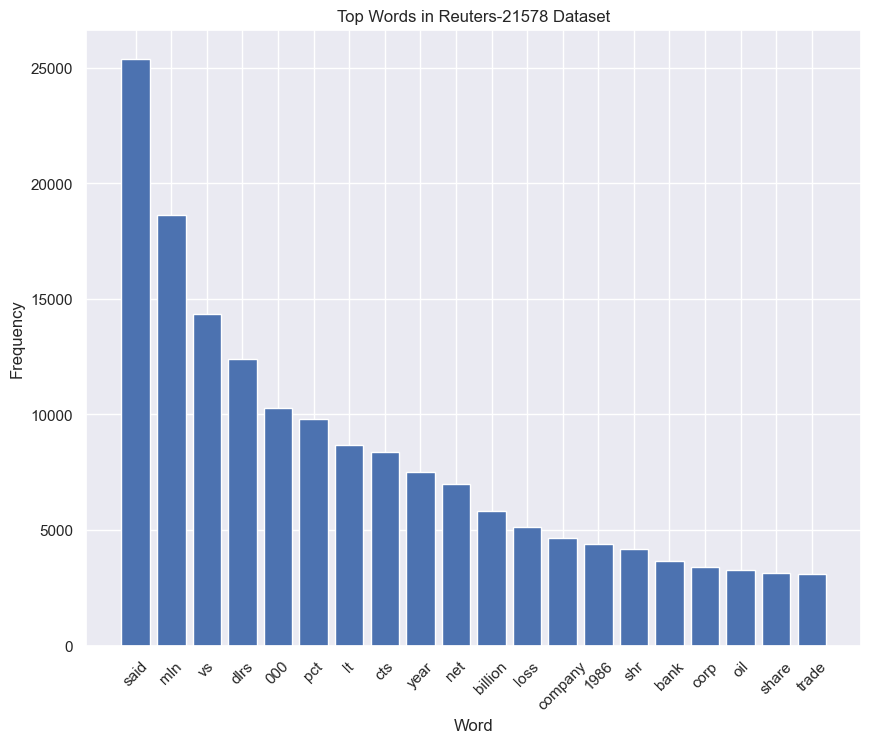

In [29]:
import nltk
import numpy as np
import matplotlib.pyplot as plt
from nltk.corpus import reuters
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(stop_words='english', max_features=20)
X = vectorizer.fit_transform(reuters.raw(doc_id) for doc_id in documents)

# Sum up the counts of each term to get the total count across all documents
word_counts = np.sum(X.toarray(), axis=0)
words = vectorizer.get_feature_names_out()

# Sort words by their count
sorted_word_counts = sorted(zip(words, word_counts), key=lambda x: x[1], reverse=True)

words, counts = zip(*sorted_word_counts)

plt.figure(figsize=(10, 8))
plt.bar(words, counts)
plt.xticks(rotation=45)
plt.xlabel('Word')
plt.ylabel('Frequency')
plt.title('Top Words in Reuters-21578 Dataset')
plt.show()




- Words are alot more concise, less conversational
- The words displayed will allow for less context recognition
- word count is highly skewed